### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [1]:

import numpy as np
import pandas as pd

data = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/03/3_10_non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


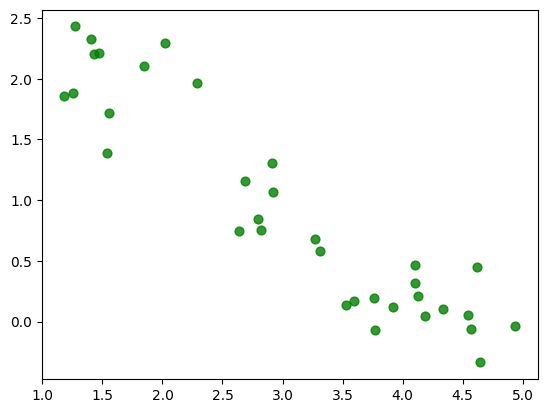

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

In [26]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w,lmbd=0.0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n
    grad += 2 * lmbd * w.flatten()
    return grad, error

In [27]:
def eval_w_next(X, y, eta, w_current,lmbd = 0.0):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current,lmbd)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current.flatten(), w_next.flatten())
    return (w_next, weight_evolution, grad)

In [28]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001, lmbd=0.0) -> np.array:
    m = X.shape[1]  # количество фичей
    # инициализируем веса случайно
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lmbd)
    step = 0
    # цикл до сходимости
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lmbd)
        step += 1
        if step % 100 == 0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w


In [31]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008,epsilon=0.0001,lmbd = 0.01)

step 100 |w-w_next|=0.00330, grad=[-0.39624233  0.11446654]
step 200 |w-w_next|=0.00267, grad=[-0.32089188  0.09269928]
step 300 |w-w_next|=0.00216, grad=[-0.25987026  0.07507135]
step 400 |w-w_next|=0.00175, grad=[-0.21045267  0.06079559]
step 500 |w-w_next|=0.00142, grad=[-0.17043245  0.04923455]
step 600 |w-w_next|=0.00115, grad=[-0.13802258  0.03987198]
step 700 |w-w_next|=0.00093, grad=[-0.11177586  0.03228982]
step 800 |w-w_next|=0.00075, grad=[-0.09052027  0.02614951]
step 900 |w-w_next|=0.00061, grad=[-0.07330671  0.02117685]
step 1000 |w-w_next|=0.00049, grad=[-0.05936652  0.01714981]
step 1100 |w-w_next|=0.00040, grad=[-0.04807723  0.01388856]
step 1200 |w-w_next|=0.00032, grad=[-0.03893474  0.01124747]
step 1300 |w-w_next|=0.00026, grad=[-0.03153081  0.00910862]
step 1400 |w-w_next|=0.00021, grad=[-0.02553483  0.0073765 ]
step 1500 |w-w_next|=0.00017, grad=[-0.02067906  0.00597377]
step 1600 |w-w_next|=0.00014, grad=[-0.01674668  0.00483778]
step 1700 |w-w_next|=0.00011, gra

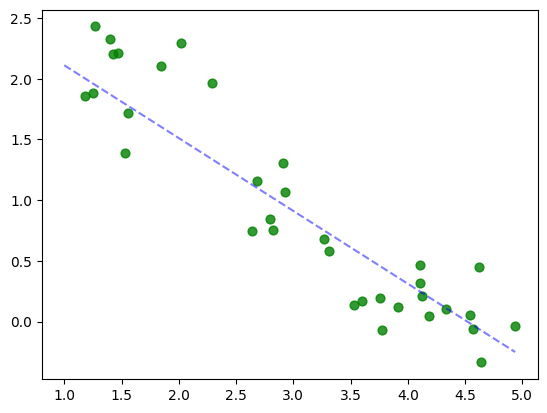

In [32]:
support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборки в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)
# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()